In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
# Checking for NULL Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


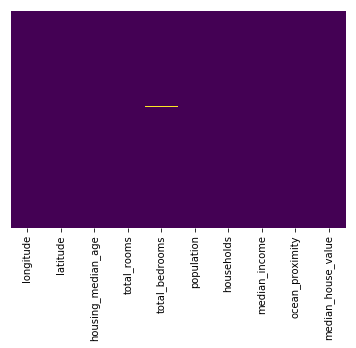

In [4]:
# Heatmap of NULL Values to get a Better Look
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# total_bedrooms has a few NULL Values

In [6]:
# Checking the Mean of total_bedrooms in order to fill them
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# We now have to fill alll the NULL values with 538
def impute_bedrooms(cols):
    total_bedrooms = cols[0]
    
    if pd.isnull(total_bedrooms):
         return 538

    else:
        return total_bedrooms

In [8]:
df['total_bedrooms'] = df[['total_bedrooms']].apply(impute_bedrooms,axis=1)

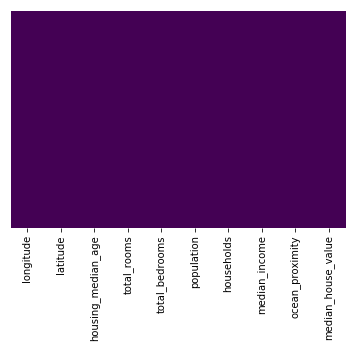

In [9]:
# Heatmap to Verify the changes
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# Now we have to make Dummy values for Categorical Variable 
# Here We Have only 1 Categorical Variable which is ocean_proximity , so Let's make it Numerical

In [11]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
# There are 4 Categories Under Ocean_proximity
df = pd.get_dummies(df,columns=["ocean_proximity"],drop_first=True)

In [13]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,0,0,1,0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,0,0,1,0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,0,0,1,0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,0,0,1,0
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,0,0,1,0


In [14]:
# Now Train Test Split
from sklearn.model_selection import train_test_split

In [15]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']]
y = df['median_house_value']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
# We need to Standardize 
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train,y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
scaled_features = scaler.transform(X_train,y_train)

C:\Users\Mohit Pawar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


In [31]:
print(scaled_features)

[[ 0.72026503 -0.6763631   1.54231204 ... -0.01556621 -0.35207022
  -0.38670469]
 [-1.1298396   1.91635176  1.14432091 ... -0.01556621 -0.35207022
  -0.38670469]
 [-0.78575006  1.47722527 -0.68643828 ... -0.01556621 -0.35207022
  -0.38670469]
 ...
 [-1.08994516  0.77649153 -1.80081344 ... -0.01556621 -0.35207022
  -0.38670469]
 [-1.18469445  0.79984932  0.58713333 ... -0.01556621 -0.35207022
  -0.38670469]
 [-0.97524865  0.5662714  -0.44764361 ... -0.01556621 -0.35207022
  -0.38670469]]


In [28]:
 # Now for test sets

In [32]:
scaler1 = StandardScaler()

In [33]:
scaler1.fit(X_test,y_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaled_features1 = scaler.transform(X_test,y_test)

C:\Users\Mohit Pawar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


In [35]:
print(scaled_features1)

[[-1.45398192  0.97736854  0.58713333 ... -0.01556621 -0.35207022
   2.5859526 ]
 [ 0.62551573 -0.88191167  0.66673155 ... -0.01556621 -0.35207022
   2.5859526 ]
 [ 0.6903442  -0.74176492  1.46271381 ... -0.01556621 -0.35207022
  -0.38670469]
 ...
 [-1.43902151  0.96802542  1.86070494 ... -0.01556621 -0.35207022
   2.5859526 ]
 [-1.24952292  0.90729516 -1.08442941 ... -0.01556621  2.84034246
  -0.38670469]
 [-1.16474724  1.0707997  -1.24362586 ... -0.01556621 -0.35207022
  -0.38670469]]


In [44]:
# Applying Linear Regression Model
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
predictions = lm.predict(X_test)

In [42]:
from sklearn import metrics

In [43]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 72439.86250916224


In [45]:
# Now Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
predictions = dtree.predict(X_test)

In [48]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 69509.4076272321


In [49]:
# Now Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
rfc_pred = rfc.predict(X_test)

In [62]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 69509.4076272321


In [63]:
# Best One is Random Forest Regressor

In [65]:
# Bonus part 
# Taking X as Median Income
X = df[[ 'median_income']]
y = df['median_house_value']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [67]:
lm = LinearRegression()

In [68]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
predictions = lm.predict(X_test)

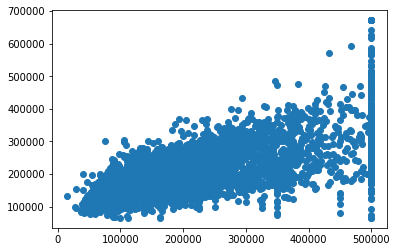

In [70]:
plt.scatter(y_test,predictions)